In [ ]:
%matplotlib inline


# Circular Hough Transforms

The Hough transform in its simplest form is a `method to detect
straight lines <https://en.wikipedia.org/wiki/Hough_transform>`__
but it can also be used to detect circles or ellipses.
The algorithm assumes that the edge is detected and it is robust against
noise or missing points.

## Circle detection

In the following example, the Hough transform is used to detect
coin positions and match their edges. We provide a range of
plausible radii. For each radius, two circles are extracted and
we finally keep the five most prominent candidates.
The result shows that coin positions are well-detected.


### Algorithm overview

Given a black circle on a white background, we first guess its
radius (or a range of radii) to construct a new circle.
This circle is applied on each black pixel of the original picture
and the coordinates of this circle are voting in an accumulator.
From this geometrical construction, the original circle center
position receives the highest score.

Note that the accumulator size is built to be larger than the
original picture in order to detect centers outside the frame.
Its size is extended by two times the larger radius.


(8, 70, 200)


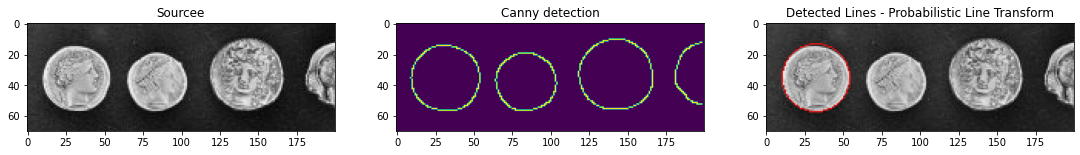

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[160:230, 70:270])
# image = data.coins()
image_original = image.copy()
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(start = 20, stop = 35, step = 2)
hough_res = hough_circle(edges, hough_radii)
print(hough_res.shape)


# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)
# print(accums)
# Draw them
# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)
    
# ax.imshow(image, cmap=plt.cm.gray)
# plt.show()


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(image_original, "gray"), plt.title("Sourcee")   
plt.subplot(152), plt.imshow(edges), plt.title("Canny detection")
plt.subplot(153), plt.imshow(image), plt.title("Detected Lines - Probabilistic Line Transform")
plt.show()

# Com opencv
https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html

In [ ]:
import requests
"""Download da imagem de teste"""
img_data = requests.get('https://www.radiosantacruzfmg.com.br/assets/uploads/imagens/e6bb6-semafaro.jpg').content

with open('semaforo.png', 'wb') as handler:
    handler.write(img_data)

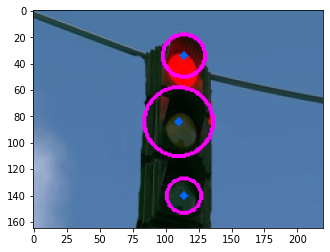

In [ ]:
import sys
import cv2 as cv
import numpy as np
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
from skimage import data, color

# src = img_as_ubyte(data.coins()[160:230, 70:270])
# gray = np.copy(src)
# src = cv.cvtColor(src, cv.COLOR_GRAY2BGR)
## 
# # Imagem teste
src = cv.imread('semaforo.png')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.resize(src,(int(src.shape[1]/2),int(src.shape[0]/2)))
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

## [reduce_noise]
# Reduce the noise to avoid false circle detection
gray = cv.medianBlur(gray, 5)
## [reduce_noise]

## [houghcircles]
rows = gray.shape[0]
# circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, dp = 1, minDist = rows / 8, param1=100, param2=30, minRadius=1, maxRadius=30)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, dp = 1, minDist = rows/4, param1=100, param2=10, minRadius=10, maxRadius=30)

# circles -> [[x,y,radius]]
## [houghcircles]

## [draw]
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 255), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 2)
        
## [draw]

## [display]
# cv.imshow("detected circles", src)
# cv.waitKey(0)

## [display]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
ax.imshow(src, cmap=plt.cm.gray)
plt.show()